This is the gini(us) playground, where we are developing the gini calculation. 

In [ ]:
import pandas
from typing import List
from itertools import combinations
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

In [ ]:

test=pandas.read_csv("../data/df_test.csv")
train=pandas.read_csv("../data/df_train.csv")

In [ ]:
def overallginius():
    # should list with tuples (feature, gini value)
    # for each data coloum
    # take in (feature, type)
    # sum lenght of data
    # gini for each feature
    # 
    pass

In [ ]:
def gini_overall(datal,datar):
    lsize = len(datal)
    rsize = len(datar)
    size = lsize+rsize
    return gini_oneside(datal)*(lsize/size)+gini_oneside(datar)*(rsize/size)

In [ ]:
def gini_oneside(data):
    """Takes a list of labels for one side of a 
    split and returns gini index for that side"""
    size = len(data)
    types = set(data)
    represented = Counter(data)
    gini = 1
    for key, value in represented.items():
        gini -= (value/size)**2
    return gini

In [ ]:
train

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,type
0,1.51839,12.85,3.67,1.24,72.57,0.62,8.68,0.00,0.35,2
1,1.52081,13.78,2.28,1.43,71.99,0.49,9.85,0.00,0.17,2
2,1.51708,13.72,3.68,1.81,72.06,0.64,7.88,0.00,0.00,2
3,1.52739,11.02,0.00,0.75,73.08,0.00,14.96,0.00,0.00,2
4,1.52210,13.73,3.84,0.72,71.76,0.17,9.74,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...
144,1.51755,12.71,3.42,1.20,73.20,0.59,8.64,0.00,0.00,1
145,1.51800,13.71,3.93,1.54,71.81,0.54,8.21,0.00,0.15,2
146,1.52365,15.79,1.83,1.31,70.43,0.31,8.61,1.68,0.00,7
147,1.51571,12.72,3.46,1.56,73.20,0.67,8.09,0.00,0.24,1


In [ ]:
def find_split(data):
    results=[]
    gini_min = 1000
    threshold = None
    best_feature= None
    for feature in data.loc[:, data.columns != "type"]:
        #sort data by feature here
        sl = list(set(data.sort_values(feature)[feature]))
        list_PS = [(sl[i+1]+sl[i])/2 for i in range(len(sl)-1)]
        #find betweeen values for each pair of values in sorted 
        for PS in list_PS:#itterate through between values instead 
            mask = train[feature]>PS
            split = list(data[mask]["type"])
            antisplit = list(data[-mask]["type"]);
            gini_val = gini_overall(split,antisplit)
            if gini_val < gini_min:
                gini_min = gini_val
                threshold = PS 
                best_feature = feature
            results.append([PS, gini_overall(split,antisplit),feature])
    return (gini_min, threshold, best_feature)

In [ ]:
find_split(train)

(0.6199065196548418, 0.4, 'Ba')

In [ ]:
#plt.plot([0+(i/20) for i in range (100)],results)
#plt.axvline(x=threshold,color="r",label="YAY")
#plt.legend();

In [ ]:
from sklearn.tree import DecisionTreeClassifier
realthing=DecisionTreeClassifier(max_depth=3)

In [ ]:
train.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'type'], dtype='object')

In [ ]:
realthing.fit(train.loc[:, train.columns != "type"],train["type"])

DecisionTreeClassifier(max_depth=3)

In [ ]:
from sklearn import tree

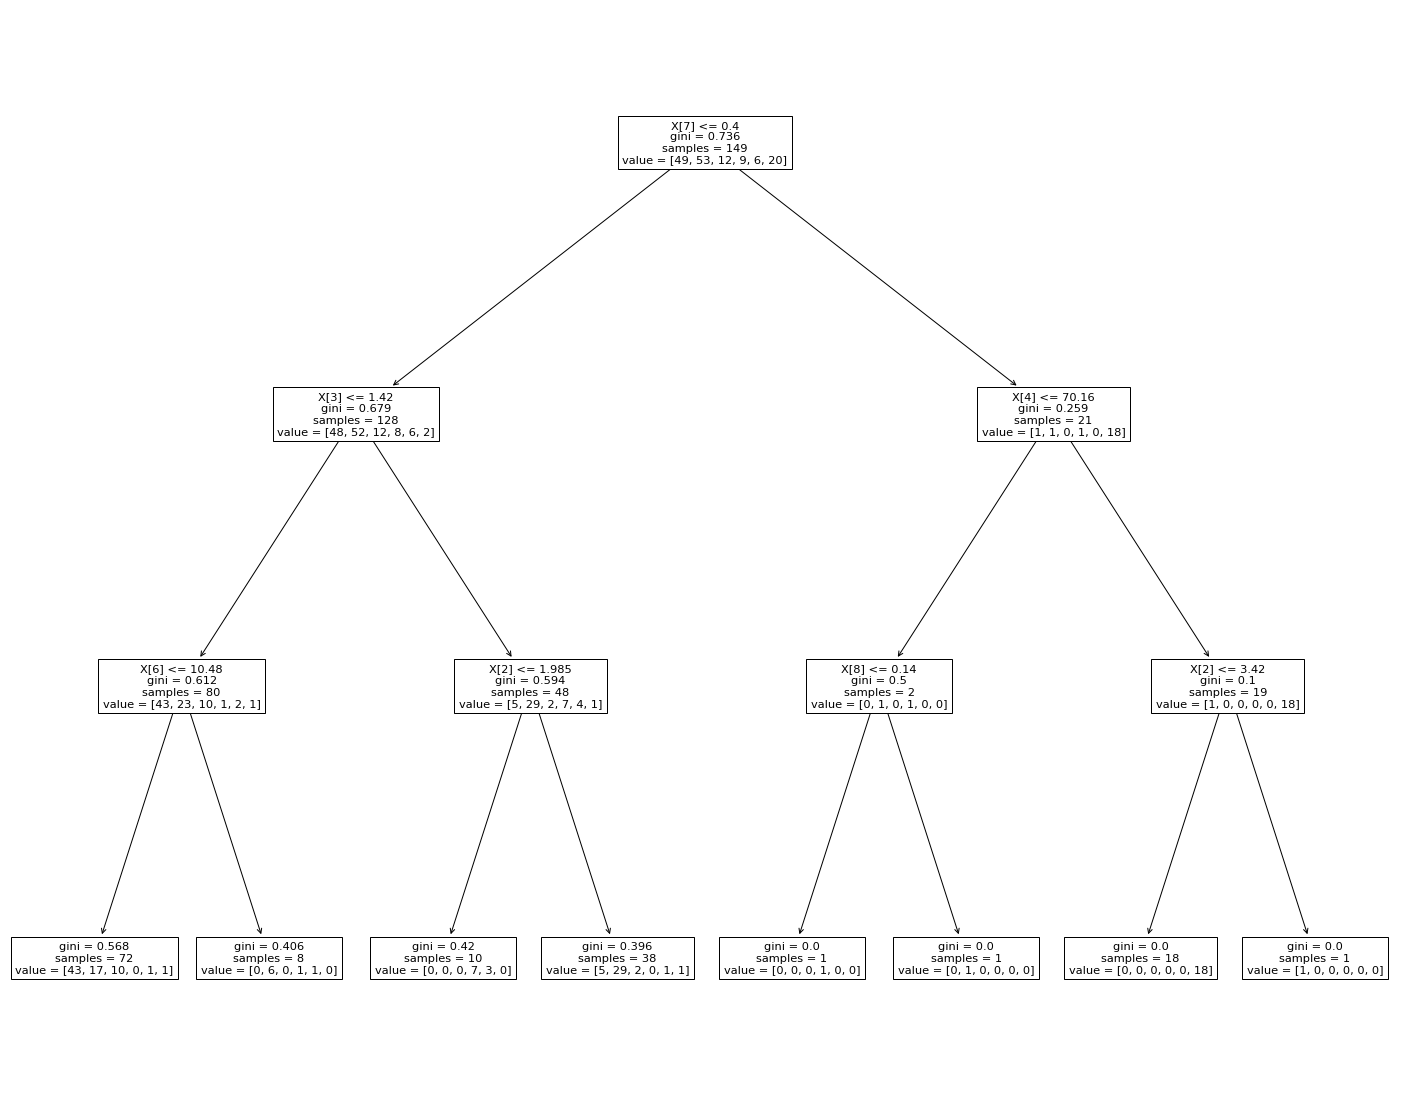

In [ ]:
fig = plt.figure(figsize=(25,20))
_=tree.plot_tree(realthing)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=58866f15-1cff-4fef-9525-5c3070562370' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>